

# 1-Importation des Bibliothèques Essentielles

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
classes=['healthy','Un-healthy']

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

**Enregistrement des données EEG**  

Les signaux EEG sont divisés en bandes de fréquences caractéristiques : δ (0,5-4 Hz), θ (4-8 Hz), α (8-13 Hz) et β (13-30 Hz). Dans cette étude, les données EEG ont été collectées auprès de 400 individus, dont 200 épileptiques et 200 normaux, admis au département de neurologie de l'Hôpital de l'Université de Dicle.  

Les enregistrements, effectués avec le système PCI-MIO 16E DAQ, offrent un traitement en temps réel et une conversion analogique-numérique 12 bits. Les données sont filtrées entre 0,53 et 40 Hz, selon le système international 10-20, et échantillonnées à 173 Hz. Des segments de 23,6 secondes issus d'enregistrements EEG de 24 heures ont été analysés.  

Les canaux bipolaires F7-C3, F8-C4, T5-O1 et T6-O2 ont été utilisés pour étudier 500 segments EEG incluant des complexes pointe-onde, des artefacts et des EEG normaux. Ces données permettent d’évaluer les performances d’un classificateur dans la détection de l’épilepsie.  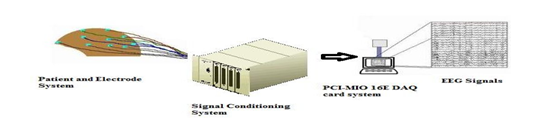

The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.

The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

# 2-Chargement de dataset

In [ ]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

# 3-Aperçu des premières lignes du jeu de données

In [ ]:
df.head()

Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

# 4-Aperçu des dernières lignes du jeu de donnée

In [ ]:
df.tail()

Unnamed  X1  X2  X3  X4   X5   X6   X7   X8   X9  ...  X170  X171  \
11495  X22.V1.114 -22 -22 -23 -26  -36  -42  -45  -42  -45  ...    15    16   
11496  X19.V1.354 -47 -11  28  77  141  211  246  240  193  ...   -65   -33   
11497    X8.V1.28  14   6 -13 -16   10   26   27   -9    4  ...   -65   -48   
11498  X10.V1.932 -40 -25  -9 -12   -2   12    7   19   22  ...   121   135   
11499  X16.V1.210  29  41  57  72   74   62   54   43   31  ...   -59   -25   

       X172  X173  X174  X175  X176  X177  X178  y  
11495    12     5    -1   -18   -37   -47   -48  2  
11496    -7    14    27    48    77   117   170  1  
11497   -61   -62   -67   -30    -2    -1    -8  5  
11498   148   143   116    86    68    59    55  3  
11499    -4     2     5     4    -2     2    20  4  

[5 rows x 180 columns]

# 4-Suppression des colonnes inutiles

In [ ]:
df = df.drop(columns=['Unnamed'], errors='ignore')

# 5-Informations générales sur le DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


# 6-Statistiques descriptives du DataFrame

In [ ]:
df.describe()

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

       ...          X170          X171          X172          X173  \
count  ...  11500.000000  11500.000000  11500.000000  11500.000000   
mean   ...    -10.145739    -11.630348    -12.943478    -13.668870   
std    ...    164.652883    166.149790    168.554058    168.556486   
min    ...  -1867.000000  -1865.000000  -1642.000000  -1723.000000   
25%    ...    -55.000000    -56.000000    -56.000000    -56.000000   
50%    ...     -9.000000    -10.000000    -10.000000    -10.000000   
75%    ...     34.000000     34.000000     33.000000     33.000000   
max    ...   1777.000000   1472.000000   1319.000000   1436.000000   

               X174          X175          X176          X177          X178  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -13.363304    -13.045043    -12.705130    -12.426000    -12.195652   
std      167.257290    164.241019    162.895832    162.886311    164.852015   
min    -1866.000000  -1863.000000  -1781.000000  -1727.000000  -1829.000000   
25%      -55.000000    -56.000000    -55.000000    -55.000000    -55.000000   
50%      -10.000000     -9.000000     -9.000000     -9.000000     -9.000000   
75%       34.000000     34.000000     34.000000     34.000000     34.000000   
max     1733.000000   1958.000000   2047.000000   2047.000000   1915.000000   

                  y  
count  11500.000000  
mean       3.000000  
std        1.414275  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  

[8 rows x 179 columns]



Il y a 179 colonnes numériques (de X1 à X178), chacune représentant  une caractéristique ou une mesure dans le jeu de données.
La colonne y (179) représente le label.



*   count : Chaque colonne contient 11 500 valeurs, ce qui indique qu'il n'y a pas de données manquantes.

*  mean : Moyenne des valeurs de chaque colonne. Par exemple, pour X1, la moyenne est de -11.58, indiquant que la plupart des valeurs de cette colonne sont légèrement négatives.



* std : Écart-type (dispersion des données). Les écarts-types sont élevés, indiquant une large variabilité entre les valeurs.
* min et max : Valeurs minimales et maximales pour chaque colonne.
 Ex. : X1 varie de -1 839 à 1 726.
25%, 50% (médiane), 75% : Quartiles, indiquant la distribution des données. Par exemple, pour X1, 50% des valeurs se situent entre -8 et 34.

Insights généraux :
Les colonnes ont des distributions avec des plages très larges (valeurs négatives et positives importantes).

On conclut que notre dataset necessite une normalisation (StandardScaler) avant de l'utiliser .

# 7-Statistiques descriptives pour la colonne y

In [ ]:
df['y'].describe()

count    11500.000000
mean         3.000000
std          1.414275
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: y, dtype: float64

Les statistiques de la colonne y montrent une distribution symétrique entre 1 et 5 :

Moyenne (3) et médiane (3) sont identiques, indiquant un équilibre.
L'écart-type (1,414) montre une variabilité modérée.
Les quartiles (25% = 2, 50% = 3, 75% = 4) révèlent une répartition uniforme.
Les données sont équilibrées, adaptées à une échelle discrète

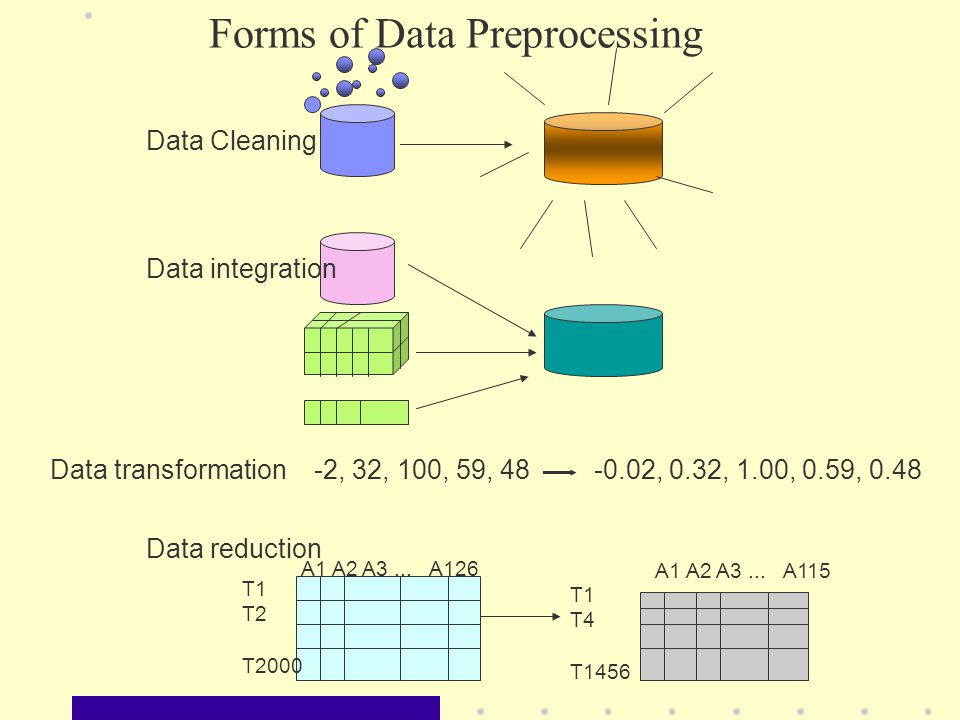

# ** 8-Feature Distributions **
Les histogrammes montrent les distributions de densité :

La plupart des features ont une distribution unimodale, avec des valeurs concentrées autour de 0. Cela suggère une distribution normale ou quasi-normale pour beaucoup d'entre elles.
Des variations visibles apparaissent dans l'étalement et l'intensité des pics selon les features :
Certaines ont un étalement plus étroit, indiquant une variance plus faible.
D'autres présentent des queues légèrement plus lourdes, ce qui pourrait indiquer la présence de valeurs aberrantes ou un comportement non normal des données.

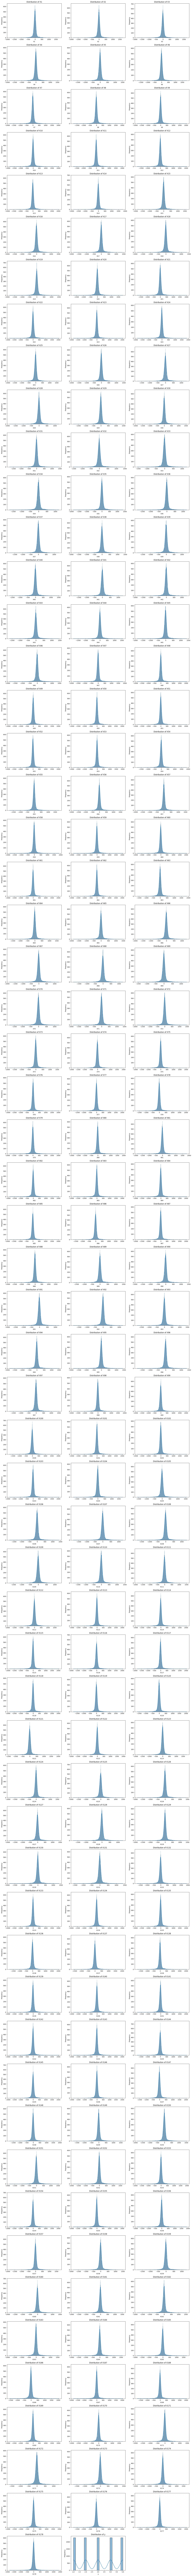

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurer la taille de la figure globale
num_columns = df.select_dtypes(include=['number']).columns  # Sélectionner uniquement les colonnes numériques
num_features = len(num_columns)
cols_per_row = 3  # Nombre d'histogrammes par ligne

# Calculer le nombre de lignes nécessaires
rows = -(-num_features // cols_per_row)  # Division entière arrondie vers le haut

# Créer la figure
plt.figure(figsize=(cols_per_row * 6, rows * 4))

# Itérer sur chaque colonne et tracer
for i, col in enumerate(num_columns):
    plt.subplot(rows, cols_per_row, i + 1)  # Ajouter un subplot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


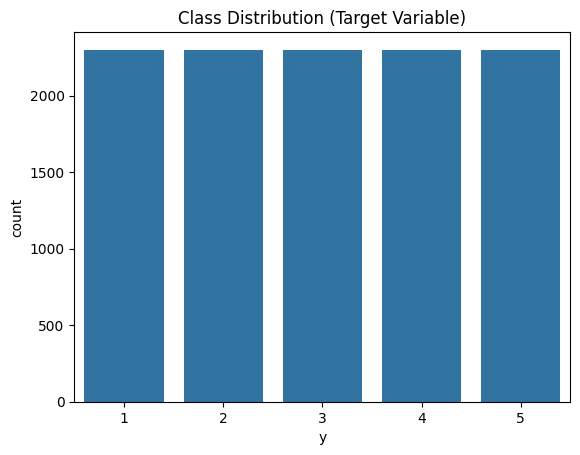

In [ ]:
sns.countplot(x=df['y'])
plt.title('Class Distribution (Target Variable)')
plt.show()


Les distributions des caractéristiques (X1, X2, X3, etc.) montrent des formes similaires à des distributions normales, avec des valeurs concentrées autour de la moyenne.

<ipython-input-11-f68ac838dd9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(df['y'])


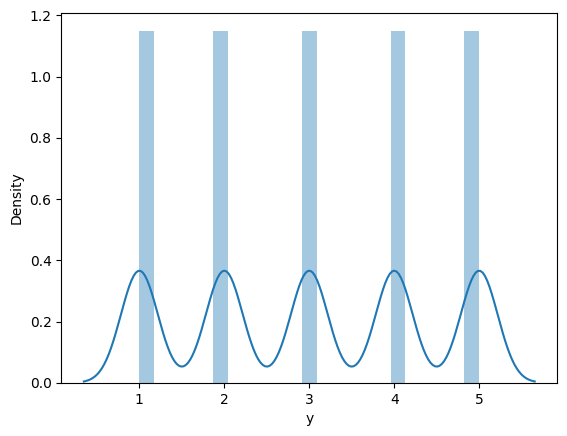

In [ ]:
sp_untransformed = sns.distplot(df['y'])

Le graphique montre une répartition équilibrée des labels EEG (1 à 5), correspondant aux différentes conditions (yeux ouverts, fermés, région saine, tumorale, épilepsie). Chaque catégorie semble contenir un nombre similaire d'enregistrements, ce qui est idéal pour éviter le biais dans un modèle d'apprentissage supervisé. La courbe KDE n'est pas pertinente ici, car les labels sont des valeurs discrètes.



The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


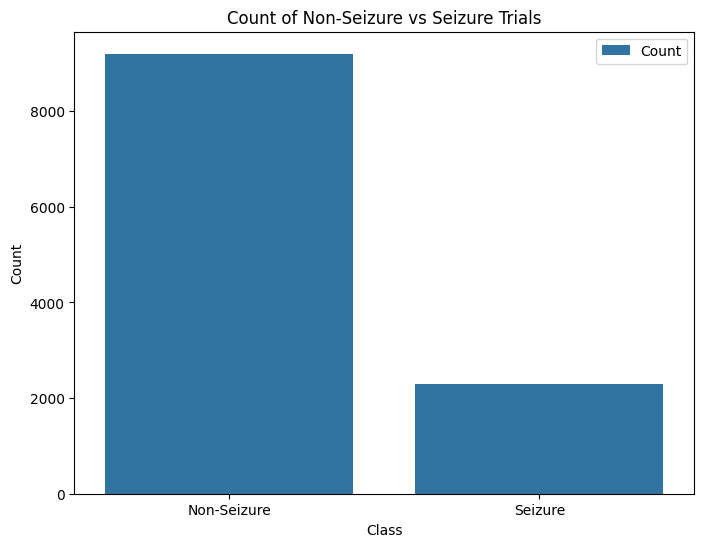

In [ ]:

tgt = df['y'].copy()

tgt[tgt > 1] = 0

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=tgt, label="Count")


value_counts = tgt.value_counts()
non_seizure = value_counts.get(0, 0)
seizure = value_counts.get(1, 0)

print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

plt.title('Count of Non-Seizure vs Seizure Trials')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Seizure', 'Seizure'])
plt.show()

Le graphique montre un déséquilibre marqué :


*   Classe Non-Seizure (0) : 9,200 essais.

*   Classe Seizure (1) : 2,300 essais.



# **Data preparation**

# **I. Data cleaning**


# I.1: Checking for missing values

In [ ]:
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

Absence de valeurs manquantes dans le jeu de données


*   Les données sont complètes et prêtes à être utilisées.

Text(0.5, 1.0, 'Total Missing Values')

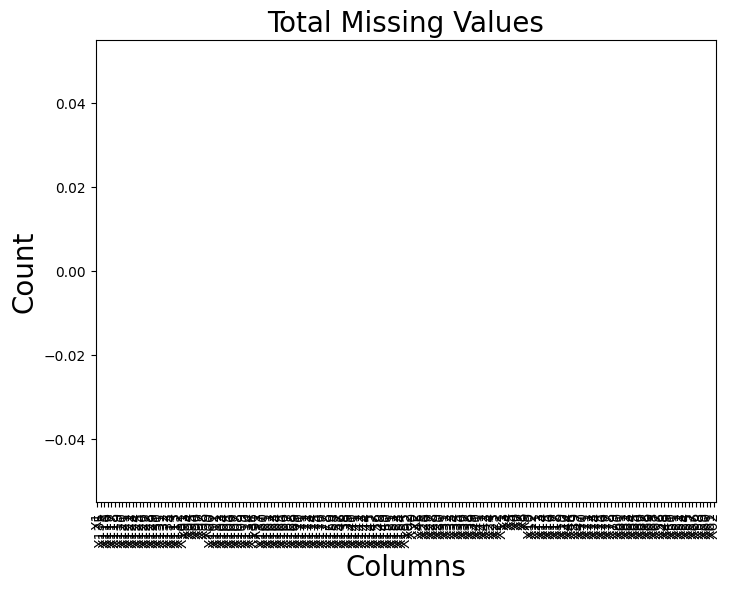

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(175)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

**Calcul de la matrice de corrélation**
Interpretation of the Correlation Matrix:
The correlation matrix provides insights into the pairwise relationships between all the features and the target variable (y). Here’s how to interpret the matrix:

1. Diagonal Values:
The diagonal values are all 1.0, as each feature is perfectly correlated with itself.
This is expected and holds no special significance for analysis.
2. Feature-to-Feature Correlation (Off-Diagonal Values):
Strong Positive Correlation:

For example, X1 and X2 have a correlation of 0.9477, indicating a very strong linear relationship.
Such highly correlated features might be redundant and can lead to multicollinearity, which could negatively impact model performance.
Consider dimensionality reduction techniques like PCA or removing redundant features.
Weak/No Correlation:

Some features (e.g., X1 and X175) have correlations close to 0.0361, showing almost no linear relationship.
These features might represent independent aspects of the dataset and are valuable for capturing diverse information.
Negative Correlation:

Occasionally, weak negative correlations might appear (e.g., between X178 and some earlier features), but none in this dataset seem strongly negatively correlated.



#I.2: Matrice de correlation


Une matrice de corrélation est un tableau carré montrant les coefficients de corrélation entre plusieurs variables d’un jeu de données.
 Ces coefficients, variant entre -1 et 1, mesurent la force et la direction des relations linéaires entre les variables.

In [ ]:
corr = df.corr(numeric_only=True)
corr

X1        X2        X3        X4        X5        X6        X7  \
X1    1.000000  0.947729  0.808192  0.608109  0.393674  0.218226  0.103693   
X2    0.947729  1.000000  0.944623  0.790403  0.576579  0.369803  0.211793   
X3    0.808192  0.944623  1.000000  0.939522  0.778648  0.573874  0.382493   
X4    0.608109  0.790403  0.939522  1.000000  0.938636  0.784954  0.590497   
X5    0.393674  0.576579  0.778648  0.938636  1.000000  0.941267  0.792304   
...        ...       ...       ...       ...       ...       ...       ...   
X175  0.036144  0.024290  0.015536  0.016992  0.021924  0.022444  0.014869   
X176  0.030581  0.023906  0.016982  0.016911  0.018869  0.020977  0.017016   
X177  0.024562  0.021962  0.017070  0.014671  0.013607  0.017383  0.018572   
X178  0.020022  0.018059  0.012419  0.006226  0.001298  0.004240  0.008325   
y     0.022375  0.019154  0.013469  0.004763 -0.006597 -0.018256 -0.026422   

            X8        X9       X10  ...      X170      X171      X172  \
X1    0.044483  0.027923  0.032221  ...  0.027263  0.045401  0.051630   
X2    0.109478  0.060218  0.043565  ...  0.012602  0.025937  0.031606   
X3    0.231084  0.133249  0.080003  ...  0.004575  0.011752  0.016424   
X4    0.399855  0.250052  0.150284  ... -0.001028  0.000632  0.006617   
X5    0.596424  0.410651  0.265112  ...  0.004861  0.000918  0.006488   
...        ...       ...       ...  ...       ...       ...       ...   
X175 -0.000510 -0.018552 -0.036517  ...  0.195640  0.366428  0.573335   
X176  0.005851 -0.009052 -0.025522  ...  0.084966  0.195891  0.359400   
X177  0.012590  0.001943 -0.011809  ...  0.022042  0.071946  0.175322   
X178  0.008032  0.004823 -0.001332  ... -0.004094  0.001945  0.049854   
y    -0.027478 -0.029452 -0.034459  ...  0.002707  0.012589  0.022893   

          X173      X174      X175      X176      X177      X178         y  
X1    0.049604  0.042967  0.036144  0.030581  0.024562  0.020022  0.022375  
X2    0.030452  0.025975  0.024290  0.023906  0.021962  0.018059  0.019154  
X3    0.017070  0.014837  0.015536  0.016982  0.017070  0.012419  0.013469  
X4    0.011882  0.014496  0.016992  0.016911  0.014671  0.006226  0.004763  
X5    0.013946  0.019146  0.021924  0.018869  0.013607  0.001298 -0.006597  
...        ...       ...       ...       ...       ...       ...       ...  
X175  0.782018  0.936986  1.000000  0.933893  0.759069  0.533265  0.028425  
X176  0.563321  0.767300  0.933893  1.000000  0.931826  0.759381  0.027259  
X177  0.337020  0.537493  0.759069  0.931826  1.000000  0.934330  0.026156  
X178  0.155044  0.315385  0.533265  0.759381  0.934330  1.000000  0.025168  
y     0.029172  0.028563  0.028425  0.027259  0.026156  0.025168  1.000000  

[179 rows x 179 columns]

  

---

La matrice de corrélation fournit des informations sur les relations par paires entre toutes les caractéristiques (features) et la variable cible Y.  

Les valeurs diagonales sont toutes égales à 1,0, car chaque caractéristique est parfaitement corrélée avec elle-même. Cela est attendu et ne revêt aucune signification particulière pour l’analyse.  

Les corrélations positives fortes, comme celle entre X1 et X2avec une valeur de 0,9477, indiquent une très forte relation linéaire. De telles caractéristiques fortement corrélées peuvent être redondantes et provoquer de la multicolinéarité, ce qui peut nuire aux performances du modèle. Dans ce cas, il peut être utile d’envisager des techniques de réduction de dimension, comme l'ACP (Analyse en Composantes Principales), ou de supprimer les caractéristiques redondantes.  

Certaines caractéristiques montrent une corrélation faible ou quasi inexistante, comme X1 et X178 avec une valeur proche de 0,0361. Cela traduit une quasi-absence de relation linéaire. Ces caractéristiques peuvent représenter des aspects indépendants du jeu de données et sont précieuses pour capturer des informations diverses.  

Parfois, de faibles corrélations négatives peuvent être observées, par exemple entre X178 et certaines caractéristiques antérieures. Cependant, aucune corrélation négative forte n’a été identifiée dans ce jeu de données.  



# I.2.1: Correlation heatmap

['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', '

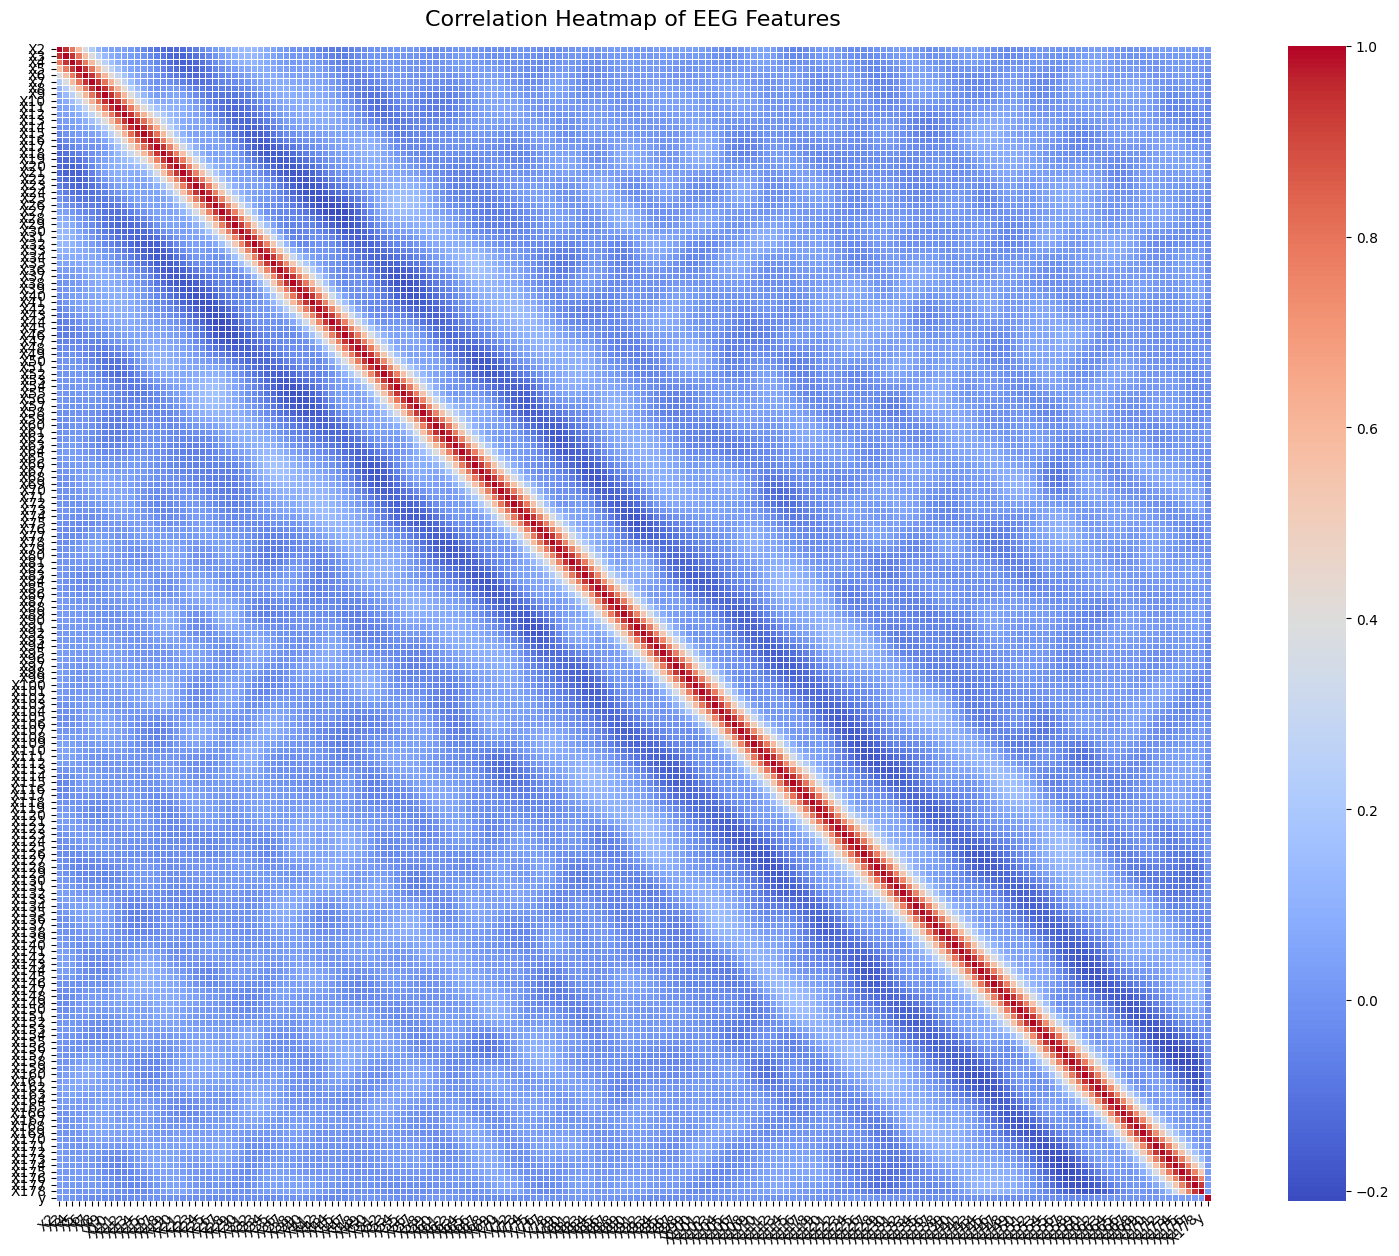

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature columns
features_mean = list(df.columns[1:179])  # Adjust range to match column index correctly
print(features_mean)

# Compute the correlation matrix
corr = df[features_mean].corr()

# Set up the figure size and style for better readability
plt.figure(figsize=(20, 15))  # Increased size for large datasets
sns.heatmap(
    corr,
    cbar=True,
    square=True,
    annot=False,  # Disable annotation to reduce clutter; can be toggled on for small matrices
    fmt=".2f",
    xticklabels=features_mean,
    yticklabels=features_mean,
    cmap="coolwarm",
    linewidths=0.5  # Add spacing between cells for better visualization
)

# Add a title for clarity
plt.title("Correlation Heatmap of EEG Features", fontsize=16, pad=15)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()


Nous n'avons pas pu trouver de corrélation importante entre les différentes ondes, car il n'y a pas de points rouge très foncés sur la matrice, ce qui indiquerait une forte corrélation.


#I.3: Skewness

In [ ]:
print ("skewnes: %f" % df['y'].skew())

skewnes: 0.000000


Une asymétrie de 0 (skewness: 0.000000) indique que la distribution de la variable y est parfaitement symétrique, sans biais vers la droite ou la gauche.



# I.4:Duplicates

In [ ]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


Il n'y a aucune ligne dupliquée dans le dataset

# I.5:outliers


Les outliers (ou valeurs aberrantes) : des valeurs qui peuvent être beaucoup plus grandes ou plus petites que la majorité des autres valeurs et peuvent fausser les analyses statistiques si elles ne sont pas traitées correctement.

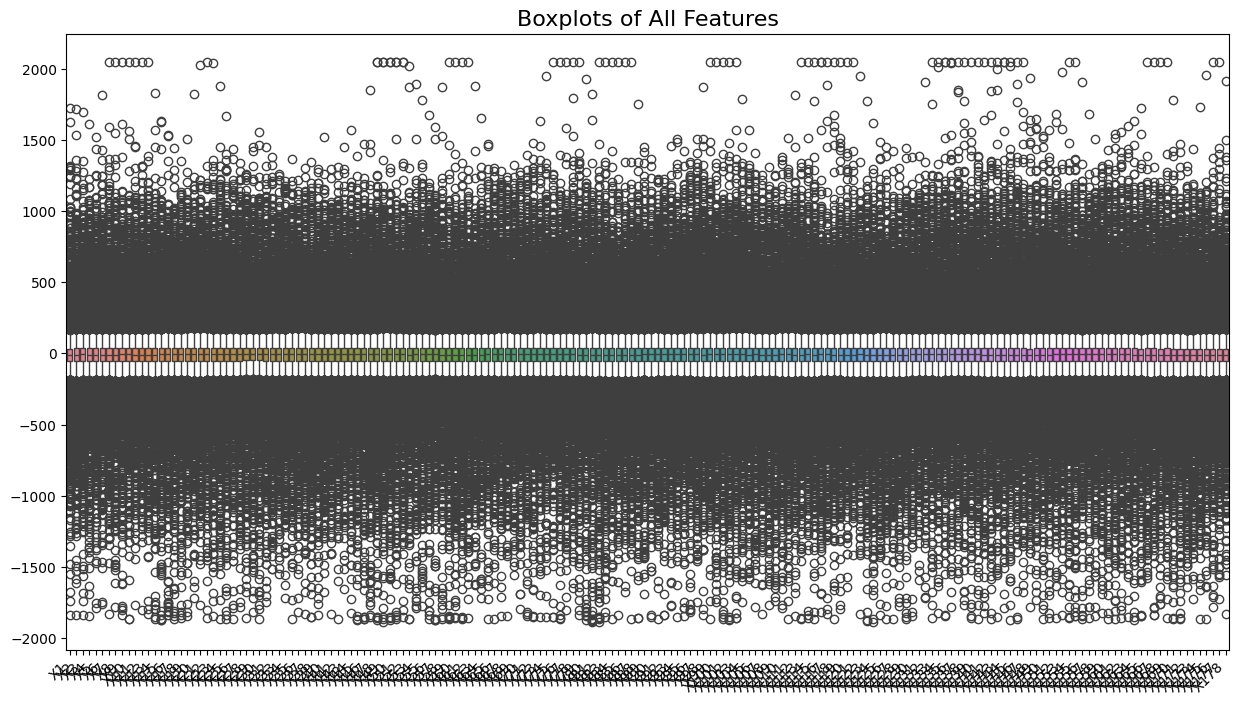

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurer la taille du graphique pour inclure toutes les colonnes
plt.figure(figsize=(15, 8))

# Tracer le boxplot pour toutes les colonnes sauf la colonne cible (y)
sns.boxplot(data=df.drop(columns=['y'], errors='ignore'))

# Ajouter un titre
plt.title('Boxplots of All Features', fontsize=16)

# Rotation des étiquettes des colonnes pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()


Il y a de nombreuses valeurs aberrantes dans le jeu de données, mais il n'est pas possible de les supprimer car il s'agit d'un jeu de données scientifique, où ces valeurs peuvent être significatives et refléter des phénomènes importants à analyser.

# I.6: Scaling/Normalization of the explanatory variables (X1 to X178)
La normalisation consiste à mettre à l'échelle les valeurs des signaux EEG de manière à ce qu'elles aient une plage de valeurs similaires.

Cela permet de faciliter l'analyse et le traitement des données

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

Saving the cleaned dataset

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
X = df.iloc[:,0:178].values
print(X.shape)
print(X)

(11500, 178)
[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


In [ ]:
y = df.iloc[:,178].values
print(y.shape)
print(y)

(11500,)
[4 1 5 ... 5 3 4]


Données :

•	Les features (caractéristiques) sont extraites des colonnes 0 à 177 du DataFrame df.

•	La variable X contient 11 500 lignes (observations) et 178 colonnes (features).

•	La sortie X montre quelques exemples de valeurs dans ces 178 dimensions.

•	y.shape indicates that the variable y has a shape of (11500,). This means it is a one-dimensional array with 11,500 elements.

•	The print(y) output shows that y contains class labels such as 4, 1, 5, 5, 3, 4, representing categorical data for the EEG dataset.


# II : Les modèles

Un **arbre de décision** est une structure en forme d'organigramme utilisée pour la prise de décision ou l'analyse de données. Chaque nœud interne représente un test ou une condition sur un attribut, chaque branche correspond à un résultat de ce test, et chaque feuille représente une décision ou une classification.

### Composantes d’un Arbre de Décision
1. **Nœud racine** : Le nœud principal qui représente le point de départ ou la décision initiale.
2. **Nœuds internes** : Représentent les tests ou divisions basés sur des conditions spécifiques.
3. **Branches** : Correspondent aux résultats possibles d’un test ou d’une décision.
4. **Feuilles (nœuds terminaux)** : Représentent les résultats finaux ou les décisions.

### Types d'Arbres de Décision
1. **Arbre de classification** : Utilisé pour des résultats catégoriels (par exemple : Oui/Non).
2. **Arbre de régression** : Utilisé pour des résultats continus (par exemple : prédiction d'une valeur numérique).

### Processus de Construction
1. **Sélectionner le meilleur attribut** pour diviser les données, en utilisant des mesures telles que :
   - **L'impureté de Gini**.
   - **Le gain d’information** (utilisé dans l’algorithme ID3).
   - **La réduction de variance** (pour la régression).
2. **Diviser les données** en sous-ensembles en fonction de l’attribut choisi.
3. **Répéter** le processus de manière récursive pour chaque sous-ensemble, jusqu’à ce que :
   - Une condition d'arrêt soit atteinte (par exemple, plus de divisions possibles).
   - Une profondeur maximale ou un nombre minimal d’échantillons soit atteint.

### Avantages
- Facile à comprendre et à interpréter.
- Nécessite peu de prétraitement des données (par exemple, pas de mise à l'échelle ou de normalisation).
- Capable de traiter des données numériques et catégoriques.

### Inconvénients
- Sensible au surapprentissage (peut apprendre le bruit des données).
- Sensible aux petites variations des données.
- Peut devenir complexe avec des arbres très profonds.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Importer plot_tree


# Créer une instance du classificateur
dtc_clf = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur les données SMOTE
dtc_clf.fit(X_train, y_train)

# Évaluer la précision sur les données d'entraînement
train_acc_decision_tree = dtc_clf.score(X_train, y_train)
print("Train accuracy of decision tree:", round(train_acc_decision_tree * 100, 2), "%")

# Évaluer la précision sur les données de test
test_acc_decision_tree = dtc_clf.score(X_test, y_test)
print("Test accuracy of decision tree:", round(test_acc_decision_tree * 100, 2), "%")
# Afficher l'arbre de décision
if not isinstance(X, pd.DataFrame):
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    X = pd.DataFrame(X, columns=numerical_columns.drop('y', errors='ignore'))

# Afficher l'arbre de décision
plt.figure(figsize=(80, 80))
plot_tree(
    dtc_clf,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=10
)
plt.title("Arbre de décision")
plt.show()

NameError: name 'X_train' is not defined

Les résultats que vous observez montrent un problème classique de surapprentissage (overfitting) dans votre modèle de l'arbre de décision :




*   Précision d'entraînement (Train accuracy) : 100 % indique que le modèle a parfaitement appris les données d'entraînement.
*   Précision de test (Test accuracy) : 48.13 % montre que le modèle ne généralise pas bien sur des données qu'il n'a pas vues.

# II.2: KNN

L'algorithme des

k-plus-proches-voisins (k-nearest neighbors ou k-NN) est l'un des algorithmes d'apprentissage automatique les plus simples, utilisé à la fois pour la classification et la régression. Dans les deux cas, l'entrée est constituée des

k exemples d'entraînement les plus proches dans l'espace des caractéristiques. La sortie dépend de l'utilisation de

k-NN pour la classification ou la régression :

Classification avec

k-NN
Dans le cas de la classification, la sortie est une appartenance à une classe. Un objet est classé par un vote majoritaire parmi ses

k plus proches voisins. L'objet est assigné à la classe la plus fréquente parmi ces voisins. Le paramètre

k est un entier positif, généralement de petite valeur. Par exemple, si

k=1, l'objet est simplement assigné à la classe de son voisin le plus proche.

Régression avec

k-NN
Dans le cas de la régression, la sortie est une valeur numérique représentant une propriété de l'objet. Cette valeur correspond à la moyenne des valeurs des

k plus proches voisins.

L'algorithme

k-NN est apprécié pour sa simplicité, mais il peut être gourmand en ressources pour des ensembles de données volumineux, car il nécessite de calculer les distances entre l'objet et tous les exemples d'entraînement.

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier
k = 2
knn_clf = KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train, y_train)
yhat = knn_clf.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Les résultats montrent une amélioration par rapport au modèle d'arbre de décision précédent, mais des problèmes de généralisation persistent :

* Train Accuracy (70.78%) : Indique que le modèle s'adapte raisonnablement bien aux données d'entraînement.
* Test Accuracy (51.35%) : Une performance encore modérée, suggérant que le modèle a des difficultés à généraliser aux nouvelles données.

# II.3: SVM

Le modèle SVM (Support Vector Machine) est un modèle d'apprentissage supervisé utilisé pour l'analyse de classification et de régression. Il représente les exemples comme des points dans un espace, de manière à ce que les exemples appartenant à des catégories distinctes soient séparés par un espace clair, aussi large que possible. Les nouveaux exemples sont ensuite projetés dans ce même espace, et leur catégorie est prédite en fonction du côté de la séparation où ils se trouvent.

En plus d'effectuer des classifications linéaires, les SVM peuvent réaliser des classifications non linéaires grâce à une technique appelée kernel trick. Cette méthode permet de mapper implicitement les entrées dans des espaces de caractéristiques de haute dimension. Par exemple, si des points de données appartiennent chacun à l'une de deux classes, l'objectif est de déterminer à quelle classe un nouveau point de données appartient. Avec les SVM, un point de données est représenté comme un vecteur de dimension
𝑝
p (une liste de
𝑝
p nombres), et l'on cherche à séparer ces points à l'aide d'un hyperplan de dimension
(
𝑝
−
1
)
(p−1).

Lorsque les données ne sont pas étiquetées, l'apprentissage supervisé n'est pas applicable. On doit alors utiliser une approche d'apprentissage non supervisé, qui tente de regrouper les données selon des similarités naturelles et de classer les nouvelles données en fonction de ces groupes formés. L'algorithme de regroupement (clustering) qui améliore les machines à vecteurs de support est appelé support vector clustering (SVC). Il est souvent utilisé dans les applications industrielles, soit lorsque les données ne sont pas étiquetées, soit lorsque seules certaines données sont étiquetées, dans le cadre d'une phase de prétraitement avant une classification.

Dans le code ci-dessous, SVC désigne Support Vector Classification.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = SVC(kernel=('rbf'))
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc) * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

Le modèle SVM avec un noyau radial de base (RBF) donne une précision globale de 56.43 % :
Confusion Matrix :

La matrice montre les erreurs de classification pour chaque classe :
* La classe 1 (seizure activity) est bien prédite avec peu de confusion.
* Les classes 2 (tumor area) et 3 (healthy brain near tumor) ont de faibles performances, montrant que le modèle a des difficultés à les différencier.
* La classe 5 (eyes open) a un bon rappel (90%), mais sa précision est faible (38%), suggérant qu'elle est souvent confondue avec d'autres classes.

# PCA


### Analyse en Composantes Principales (ACP)  

L’Analyse en Composantes Principales (ACP) est une méthode de réduction de dimensionnalité qui condense un grand ensemble de variables en un ensemble réduit tout en conservant l’essentiel de l’information.  

### Étapes principales de l’ACP :  

1. **Calculer la matrice de covariance des données.**  
2. **Trouver les vecteurs propres et leurs valeurs propres.**  
   Les vecteurs propres définissent les nouvelles directions principales, et leurs valeurs propres mesurent l'importance de chaque direction.  

3. **Classer les vecteurs propres par ordre décroissant des valeurs propres.**  
   Les premières directions expliquent le maximum de variance des données.  

4. **Choisir les \( k \) premières composantes principales.**  
   Ces \( k \) vecteurs propres forment les nouvelles dimensions réduites.  

5. **Projeter les données initiales sur ces \( k \) dimensions.**  
   Cela réduit la dimensionnalité tout en conservant l'essentiel de l’information.  

L’ACP simplifie les données tout en préservant leurs caractéristiques principales.

In [ ]:
# Initialisation et application de l'ACP
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

In [ ]:
# Calcul des valeurs propres (variance expliquée)
explained_variance = pca.explained_variance_ratio_

# Affichage des variances expliquée
print("Variance expliquée par chaque composante :", explained_variance)

In [ ]:

eig = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
    "Variance expliquée": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})

# Affichage du tableau
print(eig)

In [ ]:
# Valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_

# Trace du scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')
plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcul des contributions des variables aux composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Récupérer les noms des variables
variable_names = df.columns

# Création du graphique
plt.figure(figsize=(40, 6))

# Affichage des contributions pour les deux premières composantes principales
plt.bar(variable_names, loadings[:, 0], alpha=0.7, label='PC1')
plt.bar(variable_names, loadings[:, 1], alpha=0.7, label='PC2')

# Paramétrage des axes et du titre
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.title('Contribution des variables aux deux premières composantes')
plt.xticks(rotation=45, ha='right')  # Rotation des noms des variables pour une meilleure lisibilité
plt.legend()
plt.tight_layout()  # Ajustement de la mise en page pour éviter le chevauchement
plt.show()


In [ ]:
# Création d'un DataFrame pour les deux premières composantes principales
pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])

# Visualisation de la projection
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.show()

In [ ]:
# Vérification des colonnes dans le DataFrame 'data'
print("Colonnes dans les données :", df.columns)

# Ajout de la colonne 'Country' pour identifier les points
if 'y' in df.columns:
    pca_df['y'] = df['y']

# Visualisation
plt.figure(figsize=(20, 20))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='y', legend=None)

# Réglage des axes pour les mettre au centre
plt.axhline(0, color='grey',linewidth=0.1)  # Ligne horizontale (axe y)
plt.axvline(0, color='grey',linewidth=0.1)  # Ligne verticale (axe x)

# Limites des axes
plt.xlim(pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1)
plt.ylim(pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1)

# Etiquettes et titre
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.title("Carte des individus")

# Affichage du nom de chaque pays sur le graphique
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['PC1'][i], y=pca_df['PC2'][i], s=pca_df['y'][i],
            fontdict=dict(color='black', size=8))

plt.show()


La **régression logistique** est une méthode statistique et d'apprentissage automatique utilisée pour prédire la probabilité qu'une observation appartienne à une catégorie donnée. Bien qu'elle soit appelée "régression", elle est principalement utilisée pour des problèmes de classification, en particulier lorsque la variable cible est binaire (par exemple : Oui/Non, 0/1).

---


### Types de Régression Logistique
1. **Régression logistique binaire** : Prédit une catégorie binaire (exemple : malade ou non).
2. **Régression logistique multinomiale** : Gère des variables cibles ayant plus de deux catégories (exemple : prédire un type de transport).
3. **Régression logistique ordinale** : Utilisée lorsque les catégories de la variable cible ont un ordre (exemple : faible, moyen, élevé).

---

### Avantages
- Facile à implémenter et à interpréter.
- Rapide pour des jeux de données de petite ou moyenne taille.
- Fonctionne bien lorsqu’il existe une relation linéaire entre les caractéristiques et le logarithme des chances.

### Inconvénients
- Suppose une relation linéaire entre les caractéristiques et le logarithme des chances.
- Moins performante lorsque les classes ne sont pas bien séparables.
- Sensible aux valeurs aberrantes.

---

### Applications
- Détection de fraude.
- Analyse de survie.
- Prédiction de maladie.
- Marketing (par exemple, prédire si un client achètera ou non).

Souhaitez-vous un exemple de code en Python ou une explication approfondie sur un aspect particulier de la régression logistique ?

La régression logistique, aussi appelée régression logit ou modèle logit, est une méthode de régression utilisée lorsque la variable dépendante (VD) est catégorielle.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy LR ",str(acc_log_reg) + ' %')

# II.4 : XGBoost




### XGBoost (Extreme Gradient Boosting)  

XGBoost est une méthode d'apprentissage automatique basée sur les arbres de décision, conçue pour optimiser les performances et la vitesse. Elle est utilisée pour les tâches de classification et de régression. XGBoost est une implémentation avancée de l'algorithme de *gradient boosting*, qui combine plusieurs arbres de décision faibles (ou modèles de base) pour créer un modèle prédictif robuste.  

### Caractéristiques principales d'XGBoost :  
1. **Boosting par gradient :**  
   Les arbres sont construits de manière séquentielle, chaque nouvel arbre corrigeant les erreurs des arbres précédents en réduisant la perte de l'ensemble.  

2. **Optimisation de la vitesse et de la mémoire :**  
   XGBoost utilise des optimisations telles que la gestion efficace de la mémoire, la parallélisation des calculs et la construction rapide des arbres.  

3. **Gestion des données manquantes :**  
   Il est capable de gérer automatiquement les valeurs manquantes, en identifiant les meilleures divisions possibles.  

4. **Régularisation intégrée :**  
   L’ajout des termes de régularisation (L1 et L2) réduit le risque de surapprentissage (*overfitting*).  



In [ ]:
import time
import xgboost as xgb
from sklearn.metrics import f1_score

# Define params_xgb
params_xgb = {
    'objective': 'multi:softmax',  # Use 'multi:softprob' for probabilities
    'num_class': len(set(y_train)) - 1,  # Number of unique classes
    'max_depth': 6,  # Depth of trees
    'learning_rate': 0.1,  # Step size shrinkage
    'n_estimators': 100,  # Number of trees
    'use_label_encoder': False  # Suppress deprecation warnings
}

# Adjust class labels to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Measure training time
start_time_xgb = time.time()

# Initialize and train the XGBoost model
clf = xgb.XGBClassifier(**params_xgb, enable_categorical=False)
clf.fit(X_train, y_train_adjusted)

# Calculate execution time
end_time_xgb = time.time()
execution_time_xgb = end_time_xgb - start_time_xgb

# Make predictions on the test set
predictions_xgb = clf.predict(X_test)

# Adjust predictions back to original labels
predictions_xgb_adjusted = predictions_xgb + 1

# Calculate F1 score for multi-class classification
f1_xgb = f1_score(y_test, predictions_xgb_adjusted, average='weighted')

# Print results
print("Execution Time: {:.2f} seconds".format(execution_time_xgb))
print("F1 Score: {:.4f}".format(f1_xgb))


# Courbe PR

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Instantiate and fit the XGBoost classifier on resampled data
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train-1, y_train-1)

# Obtain prediction probabilities for the test set
y_scores = xgb_clf.predict_proba(X_test)

# Plot the Precision-Recall (PR) curve for each class
plt.figure(figsize=(10, 6))

# Loop through each class and plot the PR curve
for i in range(len(xgb_clf.classes_)):
    # Create binary labels for each class
    y_test_binary = (y_test == xgb_clf.classes_[i]).astype(int)

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test_binary, y_scores[:, i])

    # Plot PR curve for the current class
    plt.plot(recall, precision, label=f'Classe {xgb_clf.classes_[i]}')

# Add labels, legend, and grid
plt.title('Courbe Precision-Recall')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Evaluation of Classification Model Performance: ROC, Precision-Recall, and Lift Curves



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

# Assuming you have your classifier (e.g., xgb_clf) and the test data (X_test, y_test)

# Generate prediction probabilities for the test data
y_scores = xgb_clf.predict_proba(X_test)  # Get probabilities for each class

# Plotting setup
fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
colors = ["#6829c2", "#c2297b", "#29c268", "#c2a629", "#29acc2"]  # Colors for each class

# ROC and Precision-Recall curves for each class
for i in range(y_scores.shape[1]):  # Iterate over each class
    # Binarize labels for each class
    y_test_binary = (y_test == i).astype(int)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_binary, y_scores[:, i])
    ax[0].plot(fpr, tpr, color=colors[i], label=f"Class {i}")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test_binary, y_scores[:, i])
    ax[1].plot(recall, precision, color=colors[i], label=f"Class {i}")

    # Lift Curve
    sorted_indices = np.argsort(-y_scores[:, i])  # Sort by scores for class i
    sorted_y_test = y_test_binary[sorted_indices]
    cumulative_positive_rate = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
    proportion = np.arange(1, len(y_test) + 1) / len(y_test)
    lift = cumulative_positive_rate / proportion
    ax[2].plot(proportion, lift, color=colors[i], label=f"Class {i}")

# Customize plots
# ROC plot
ax[0].set_title("Receiver Operating Characteristic (ROC)")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend(loc="best")

# Precision-Recall plot
ax[1].set_title("Precision-Recall Curve")
ax[1].set_xlabel("Recall (True Positive Rate)")
ax[1].set_ylabel("Precision")
ax[1].legend(loc="best")

# Lift plot
ax[2].set_title("Lift Curve")
ax[2].set_xlabel("Proportion")
ax[2].set_ylabel("Lift")
ax[2].legend(loc="best")

plt.tight_layout()
plt.show()

# K MEANS


In [ ]:
from sklearn.cluster import KMeans
import joblib

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



# Ensure the data is 2D after PCA
print("Shape of PCA-transformed data:", X_train_pca.shape)

# Apply K-means clustering
n_clusters = 4  # You can change this based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_pca)
clusters = kmeans.labels_  # Cluster labels assigned by K-means

# Evaluation of clusters by comparing to true labels
print("Confusion Matrix:")
print(confusion_matrix(y_train, clusters))

print("\nClassification Report:")
print(classification_report(y_train, clusters))

# Visualization of clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clusters on PCA Data (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()
joblib.dump(kmeans, 'kmeans_model.pkl')


In [ ]:
import pickle

# Supposons que votre modèle est dans la variable kmeans
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

# UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# UMAP dimensionality reduction
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=66)
X_train_umap = umap.fit_transform(X_train)
X_test_umap = umap.transform(X_test)

# Train an SVM model on the UMAP-transformed data
model_umap_svm = SVC(random_state=66)
model_umap_svm.fit(X_train_umap, y_train)

# Predicting on the test data
y_pred_umap = model_umap_svm.predict(X_test_umap)

# Accuracy score
accuracy_umap_svm = accuracy_score(y_test, y_pred_umap)
print("Accuracy after UMAP with SVM:", round(accuracy_umap_svm * 100, 2), "%")

# Plotting the UMAP-transformed data
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
for label in set(y_train):
    plt.scatter(
        X_train_umap[y_train == label, 0],
        X_train_umap[y_train == label, 1],
        label=f"Class {label}", alpha=0.6
    )
plt.title("UMAP Transformation - Training Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()

# Testing data
plt.subplot(1, 2, 2)
for label in set(y_test):
    plt.scatter(
        X_test_umap[y_test == label, 0],
        X_test_umap[y_test == label, 1],
        label=f"Class {label}", alpha=0.6
    )
plt.title("UMAP Transformation - Testing Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()

plt.tight_layout()
plt.show()


D'apres tous ce qui prec

# ANN

Les ordinateurs excellent dans la résolution de problèmes mathématiques et algorithmiques, mais il est souvent difficile de définir le monde réel à l'aide d'un algorithme mathématique. La reconnaissance faciale et le traitement du langage en sont des exemples : ces tâches, simples pour les humains, ne se traduisent pas aisément en algorithmes. Les réseaux de neurones artificiels (RNA) se distinguent par leur capacité à traiter l'information d'une manière inspirée du fonctionnement de notre cerveau biologique, en s'appuyant sur le modèle du système nerveux humain. Cela les rend particulièrement efficaces pour résoudre des problèmes comme la reconnaissance faciale, que nos cerveaux biologiques réalisent avec facilité.

### Modélisation des neurones artificiels  
Les neurones artificiels sont, en essence, des modèles simplifiés des neurones biologiques. Leur conception permet de capturer l'essence du fonctionnement d'un neurone biologique. Ces neurones artificiels sont généralement appelés "perceptrons". Jetons maintenant un œil à la structure d'un perceptron.

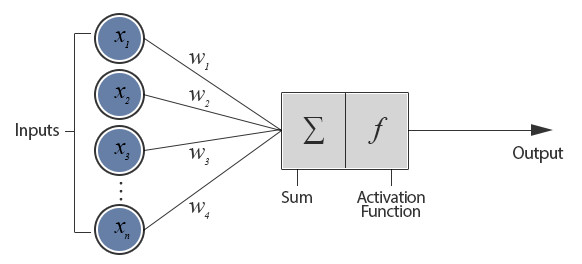

Artificial neural networks (ANNs) are composed of layers of artificial neurons working together to process information. In this tutorial, we'll focus on feedforward networks, which are a fundamental type of neural network. These networks connect perceptrons in a way that enables them to process and transform data.

Structure of a Feedforward Network
A basic feedforward network consists of:

Input Layer: Takes in the initial data features.
Hidden Layer(s): Intermediate layers where data is processed. There can be multiple hidden layers, each with any number of nodes.
Output Layer: Produces the final prediction or classification output.
Each neuron in one layer is connected to all neurons in the next layer. Signals are passed forward through the network, hence the name feedforward. The structure does not allow for backward connections.

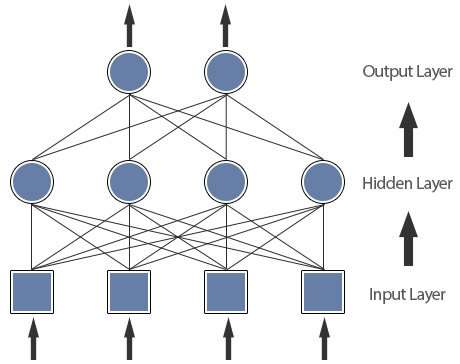

In [ ]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X and y are already defined

# Preprocessing the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)  # Scale the features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check unique values in y_train and y_test to identify the number of classes
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

# If there are values greater than the expected class range (0-4 for 5 classes), clip the values
y_train = np.clip(y_train, 0, 4)  # Ensure labels are within the 0-4 range
y_test = np.clip(y_test, 0, 4)    # Same for y_test

# Convert labels to one-hot encoding (5 classes in this case)
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

# Initializing the ANN model
classifier = Sequential()

# Adding the input layer and first hidden layer
classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu'))

# Adding the output layer with 5 units (one for each class) and softmax activation for multi-class classification
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))

# Compiling the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set
classifier.fit(X_train, y_train_encoded, batch_size=10, epochs=100)

# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predicted probabilities to class labels

# Evaluating the model on the test set
loss, acc_ANN = classifier.evaluate(X_test, y_test_encoded)
acc_ANN = round(acc_ANN * 100, 2)  # Convert accuracy to percentage

# Printing the accuracy
print(f"Test Accuracy: {acc_ANN}%")

# Optional: Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
classifier.save('ann_model.h5')  # Sauvegarder le modèle ANN dans un fichier .h5


# RNN

Un réseau neuronal récurrent (RNN) est un modèle de deep learning qui est entraîné pour traiter et convertir une entrée de données séquentielle en une sortie de données séquentielle spécifique. Les données séquentielles sont des données, telles que des mots, des phrases ou des données de séries temporelles, dans lesquelles les composants séquentiels sont interconnectés en fonction de règles de sémantique et de syntaxe complexes. Un RNN est un système logiciel composé de nombreux composants interconnectés qui imitent la façon dont les humains effectuent des conversions de données séquentielles, telles que la traduction de texte d’une langue à une autre. Les RNN sont largement remplacés par l’intelligence artificielle (IA) basée sur des transformateurs et les grands modèles de langage (LLM), qui sont beaucoup plus efficaces dans le traitement séquentiel des données.

In [ ]:
# Importing necessary libraries for RNN
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X and y are already defined

# Preprocessing the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)  # Scale the features

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check unique values in y_train and y_test to identify the number of classes
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

# If there are values greater than the expected class range (0-4 for 5 classes), clip the values
y_train = np.clip(y_train, 0, 4)  # Ensure labels are within the 0-4 range
y_test = np.clip(y_test, 0, 4)    # Same for y_test

# Convert labels to one-hot encoding (5 classes in this case)
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

# Reshape X_train and X_test for RNN input
# RNN expects input in the shape (samples, time_steps, features), so we add an extra dimension
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # 1 time step
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])  # 1 time step

# Initializing the RNN model
classifier = Sequential()

# Adding the RNN layer
classifier.add(SimpleRNN(units=50, kernel_initializer='uniform', activation='relu', input_shape=(1, X_train.shape[1])))

# Adding the output layer with 5 units (one for each class) and softmax activation for multi-class classification
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))

# Compiling the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the RNN to the training set
classifier.fit(X_train_rnn, y_train_encoded, batch_size=10, epochs=100)

# Predicting the test set results
y_pred = classifier.predict(X_test_rnn)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predicted probabilities to class labels

# Evaluating the model on the test set
loss, acc_RNN = classifier.evaluate(X_test_rnn, y_test_encoded)
acc_RNN = round(acc_RNN * 100, 2)  # Convert accuracy to percentage

# Printing the accuracy
print(f"Test Accuracy (RNN): {acc_RNN}%")

# Optional: Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))




# AUC

In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
# Prédiction des probabilités pour chaque classe
y_pred_proba = clf.predict_proba(X_test)
# Conversion de la variable cible en format one-hot pour l'AUC multi-classe
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)
# Calcul de l'AUC pour chaque classe
auc_scores = roc_auc_score(y_test_bin, y_pred_proba, average=None)

# Affichage des scores AUC pour chaque classe et de la moyenne
print("AUC pour chaque classe:", auc_scores)
print("Moyenne AUC:", auc_scores.mean())

#Installer Flask

In [ ]:
!streamlit run streamlit_ann_deployment.py & npx localtunnel --port 8501


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2q55VZ8kl0RtkhuXqYWBIuQDSa1_5uPAMiVjXcwhUMKWiakoM


In [ ]:
!pip install flask-cors

In [ ]:
!lsof -i :5000


In [ ]:
!ngrok kill

In [ ]:
!ngrok http 5000


In [ ]:
!killall ngrok # kills all ngrok processes

# Fixed Deployment ANN

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import load_model  # Import to load the pre-trained ANN model
from pyngrok import ngrok
import numpy as np

app = Flask(__name__)
CORS(app)

# Setup ngrok
public_url = ngrok.connect(5001)
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:500\"")

# Access the URL from the NgrokTunnel object
ngrok_url = public_url.public_url  # Correct way to get the URL as a string

# Description des labels des clusters
labels_description = {
    0: "1: Enregistrement de l activité epileptique. ",
    1: "2: Ils ont enregistré l'EEG dans la zone où la tumeur était localisée",
    2: "3: Activité EEG dans la zone saine du cerveau",
    3: "4: Yeux fermés ",
    4: "5: Yeux ouverts"



}

# Load the pre-trained ANN model
model = load_model('ann_model.h5')  # Adjust the path if necessary
def rnn_predict(input_file):
    try:
        # Charger le fichier CSV
        df = pd.read_csv(input_file, delimiter=',')
        df = df.drop(columns=['Unnamed'], errors='ignore')
        df = df.drop(columns=['y'], errors='ignore')

        print("Forme du dataset téléchargé:", df.shape)

        # Extraire les caractéristiques (X) de toutes les colonnes
        X = df.iloc[:, :].values  # Supposer que toutes les colonnes sont des caractéristiques
        print("Caractéristiques (X):", X[:5])

        # Standardiser les caractéristiques
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        print("Caractéristiques standardisées:", X_scaled[:5])

        # Reshaping X_scaled to be compatible with the RNN model (add the time_steps dimension)
        # Assuming 1 time step
        X_scaled_rnn = X_scaled.reshape(X_scaled.shape[0],X_scaled.shape[1])  # Shape: (samples, 1, features)
        print("Caractéristiques après reshaping pour RNN:", X_scaled_rnn.shape)

        # Prédiction avec le modèle RNN
        y_pred = model.predict(X_scaled_rnn)
        y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir les probabilités en classes
        print(f"Prédiction des classes : {y_pred_classes}")

        # Map clusters to their descriptions
        labeled_predictions = [labels_description.get(label, "Unknown") for label in y_pred_classes]
        print(f"Prédictions avec descriptions : {labeled_predictions}")

        return labeled_predictions  # Return the predictions with descriptions

    except Exception as e:
        return f"Erreur dans la prédiction : {str(e)}"



@app.route('/upload', methods=['POST'])
def upload_file():
    try:
        if 'file' not in request.files:
            return jsonify({'error': 'Aucun fichier envoyé'}), 400

        file = request.files['file']

        if file.filename == '':
            return jsonify({'error': 'Aucun fichier sélectionné'}), 400

        # Utiliser le fichier pour la prédiction (ANN)
        prediction = rnn_predict(file)

        if "Erreur" in prediction:
            return jsonify({'error': prediction}), 500

        return jsonify({'prediction': prediction, 'url': ngrok_url})  # Return the URL correctly

    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/')
def home():
    return '''
        <html><body>
        <h1>Téléchargez un fichier CSV pour effectuer une prédiction avec le modèle ANN</h1>
        <form action="/upload" method="POST" enctype="multipart/form-data">
        <input type="file" name="file"><br>
        <input type="submit" value="Prédiction">
        </form>
        <p>Accédez à votre site via ce lien : <a href="{0}" target="_blank">{0}</a></p>
        </body></html>
    '''.format(ngrok_url)

if __name__ == "__main__":
    app.run(port=5001)


# Disconnect Ngrok

In [ ]:
from pyngrok import ngrok

# Disconnect the ngrok tunnel
ngrok.disconnect("https://f1d8-35-230-182-131.ngrok-free.app")

# Optionally, you can kill the process entirely (if needed)
ngrok.kill()


# Segmentation

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from pyngrok import ngrok

# Initialize Flask app
app = Flask(__name__)
CORS(app)

# Ngrok setup
public_url = ngrok.connect(5001).public_url  # Correctly access the public URL as a string
print(f"Ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:5001\"")

# Load pre-trained models
scaler = joblib.load("scaler2.pkl")  # StandardScaler model
pca = joblib.load("pca_transform2.pkl")  # PCA model trained with n_components=2
kmeans = joblib.load("kmeans_model.pkl")  # KMeans model trained on 2D PCA output
print("Models loaded successfully.")

# Define labels for clusters
labels_description = {
    0: "Cluster 1: Eyes Open",
    1: "Cluster 2: Eyes Closed",
    2: "Cluster 3: Tumor Region",
    3: "Cluster 4: Healthy Brain",
    4: "Cluster 5: Epileptic Activity"
}

@app.route('/')
def home():
    return '''
        <html><body>
        <h1>Upload a CSV file for EEG Signal Prediction</h1>
        <form action="/upload" method="POST" enctype="multipart/form-data">
        <input type="file" name="file"><br>
        <input type="submit" value="Predict">
        </form>
        <p>Access your app via: <a href="{0}" target="_blank">{0}</a></p>
        </body></html>
    '''.format(public_url)

@app.route('/upload', methods=['POST'])
def upload_file():
    try:
        # Validate file input
        if 'file' not in request.files:
            return jsonify({'error': 'No file provided'}), 400

        file = request.files['file']
        if file.filename == '':
            return jsonify({'error': 'No file selected'}), 400

        # Load and preprocess the dataset
        df = pd.read_csv(file, delimiter=';')  # Assuming the correct delimiter is a comma, update as needed

        # Drop unnecessary columns (if they exist)
        df = df.drop(columns=['Unnamed'], errors='ignore')
        df = df.drop(columns=['y'], errors='ignore')

        print("Shape of uploaded dataset:", df.shape)

        # Check if dataset has the correct number of features
        if df.shape[1] != 178:
            return jsonify({'error': 'The dataset must have exactly 178 columns (features)'}), 400

        # Extract feature matrix
        X = df.values  # Use all columns as features
        print("Original Features (X):", X.shape)

        # Apply the pre-trained scaler to standardize the data
        X_scaled = scaler.transform(X)  # Ensure same scaling as during training
        print("Standardized Features (X_scaled):", X_scaled.shape)

        # Apply the pre-trained PCA model to reduce to 2 dimensions
        X_pca = pca.transform(X_scaled)
        print("PCA Transformed Features (X_pca):", X_pca.shape)

        # Ensure PCA output matches the expected KMeans input
        if X_pca.shape[1] != 2:
            return jsonify({'error': 'PCA did not reduce the data to 2 dimensions as expected'}), 500

        # Predict clusters using the pre-trained KMeans model
        clusters = kmeans.predict(X_pca)
        print("Predicted Clusters:", clusters)

        # Map clusters to descriptions
        labeled_predictions = [labels_description.get(label, "Unknown") for label in clusters]
        print("Labeled Predictions:", labeled_predictions)

        # Plot the clustering results
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60, alpha=0.7)
        plt.title('Clustering Results of PCA Reduced Data')
        plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
        plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')

        # Save plot as an image in memory and convert it to base64
        img = BytesIO()
        plt.savefig(img, format='png')
        img.seek(0)
        img_base64 = base64.b64encode(img.getvalue()).decode('utf8')

        # Return the figure and interpretation as a response
        interpretation = """
        <h3>Cluster Interpretation:</h3>
        <ul>
            <li><strong>Cluster 0:</strong> Eyes Open</li>
            <li><strong>Cluster 1:</strong> Eyes Closed</li>
            <li><strong>Cluster 2:</strong> Tumor Region</li>
            <li><strong>Cluster 3:</strong> Healthy Brain</li>
            <li><strong>Cluster 4:</strong> Epileptic Activity</li>
        </ul>
        <p>The scatter plot above shows how the data points are clustered into different groups based on the two principal components. Each color represents a different cluster, and the axes show the amount of variance explained by the first two principal components.</p>
        """

        return jsonify({
            'prediction': labeled_predictions,
            'url': public_url,
            'plot': img_base64,
            'interpretation': interpretation
        })

    except Exception as e:
        return jsonify({'error': f"Erreur dans la prédiction : {str(e)}"}), 500

if __name__ == "__main__":
    app.run(port=5001)
